In [1]:
import os
import pickle
from dypac import Dypac
from niak_load_confounds import load_confounds #for fmriprep: from load_confounds import load_confounds
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from nilearn import datasets
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr

Here we will desigate the paths to the preprocessed anatomical vbm data and add the files to a list.

In [2]:
path_base = '/home/lussier/Projects/data/adni/vbm/'
path_anat1 = 'output/002S0295_20060418_MP-RAGE/'
path_anat2 = 'output/002S0295_20090522_MP-RAGE/'
path_anat3 = 'output/002S0413_20140501_MPRAGE/'

path_atlas = 'code/templates/'

In [3]:
anat1 = os.path.join(path_base, path_anat1, 'smwrc1acpc_002S0295_20060418_MP-RAGE_T1w_stereolin.nii.gz')
anat2 = os.path.join(path_base, path_anat2, 'smwrc1acpc_002S0295_20090522_MP-RAGE_T1w_stereolin.nii.gz')
anat3 = os.path.join(path_base, path_anat3, 'smwrc1acpc_002S0413_20140501_MPRAGE_T1w_stereolin.nii.gz')

anat = [anat1, anat2, anat3]

We will also load an atlas for probabilistic grey matter segmentation.

In [4]:
mni = datasets.fetch_icbm152_2009()

Now we run dypac. First we specify the model, with the main relevant options. Then we fit the model on the functional data.

In [5]:
model = Dypac(subsample_size=1, n_clusters=3,  n_states=3, grey_matter=mni.gm,
              verbose=1, n_init=1, n_init_aggregation=1, n_replications=1, detrend=True, 
              smoothing_fwhm=5, standardize=True, n_batch=4, threshold_sim=0.2)
model.fit(anat) 

[MultiNiftiMasker.fit] Loading data from [/home/lussier/Projects/data/adni/vbm/output/002S0295_20060418_MP-RAGE/smwrc1acpc_002S0295_20060418_MP-RAGE_T1w_stereolin.nii.gz, /home/lussier/Projects/data/adni/vbm/output/002S0295_20090522_MP-RAGE/
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[Dypac] Restrict brain mask to grey matter
[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[Dypac] Processing batch 0
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals


/usr/local/lib/python3.6/dist-packages/dypac/dypac.py:304: UserWarning: 4 batches were requested, but only 3 datasets available. Using 4 batches instead.
  self.n_batch, len(imgs), self.n_batch
/home/lussier/.local/lib/python3.6/site-packages/nilearn/signal.py:163: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/home/lussier/.local/lib/python3.6/site-packages/nilearn/signal.py:61: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '
Replicating clusters in data #0:   0%|          | 0/1 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Trimming states: 100%|██████████| 3/3 [00:00<00:00, 137.29it/s]


Consensus clustering.
[Dypac] Processing batch 1
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images


/home/lussier/.local/lib/python3.6/site-packages/nilearn/signal.py:163: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/home/lussier/.local/lib/python3.6/site-packages/nilearn/signal.py:61: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '
Replicating clusters in data #0:   0%|          | 0/1 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Trimming states: 100%|██████████| 3/3 [00:00<00:00, 133.95it/s]


Consensus clustering.
[Dypac] Processing batch 2
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images


/home/lussier/.local/lib/python3.6/site-packages/nilearn/signal.py:163: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/home/lussier/.local/lib/python3.6/site-packages/nilearn/signal.py:61: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '
Replicating clusters in data #0:   0%|          | 0/1 [00:00<?, ?it/s]

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


Trimming states: 100%|██████████| 3/3 [00:00<00:00, 135.94it/s]


Consensus clustering.
Inter-batch consensus
Generating consensus stability maps


Dypac(grey_matter='/home/lussier/nilearn_data/icbm152_2009/mni_icbm152_nlin_sym_09a/mni_icbm152_gm_tal_nlin_sym_09a.nii.gz',
      mask=<nibabel.nifti1.Nifti1Image object at 0x7f3a7f161860>,
      memory_level=1, n_batch=3, n_clusters=3, n_init=1, n_init_aggregation=1,
      n_replications=1, random_state=RandomState(MT19937) at 0x7F3ABC7DC258,
      smoothing_fwhm=5, subsample_size=1, threshold_sim=0.2)

Visualize components maps, first in an interactive plot.


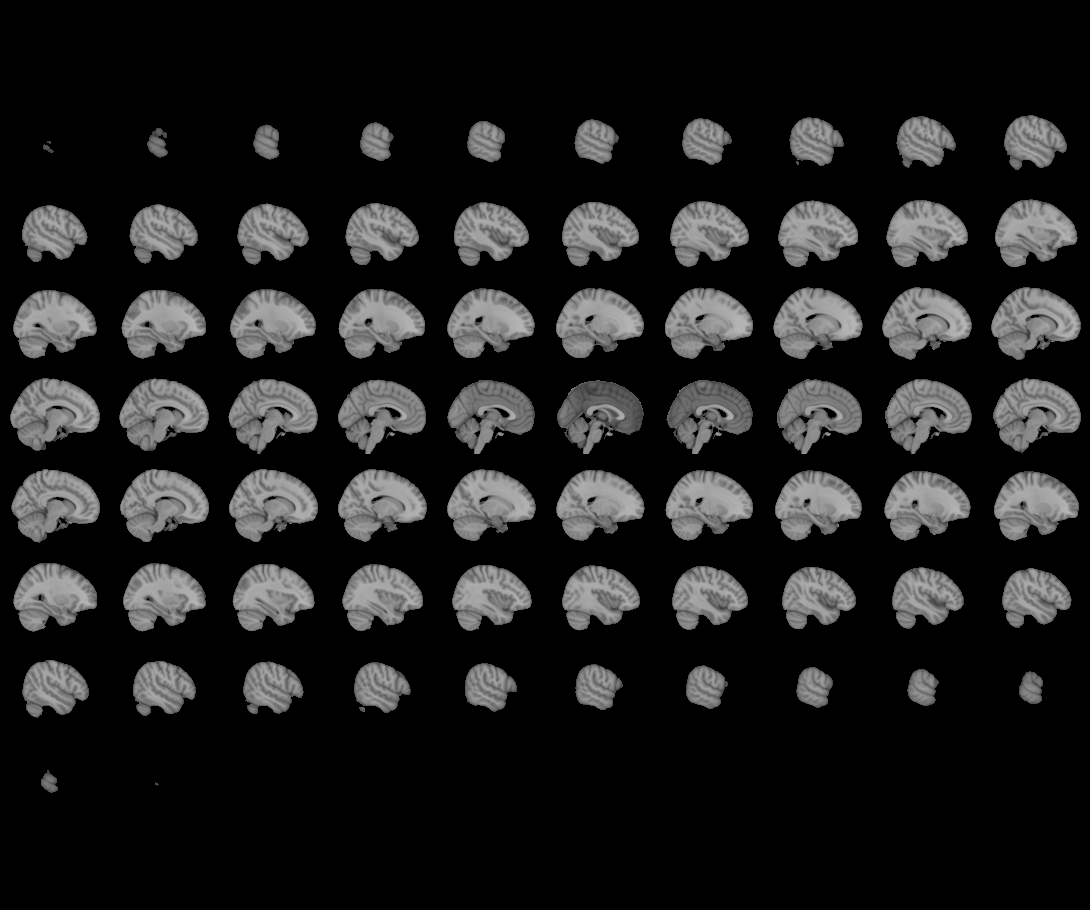
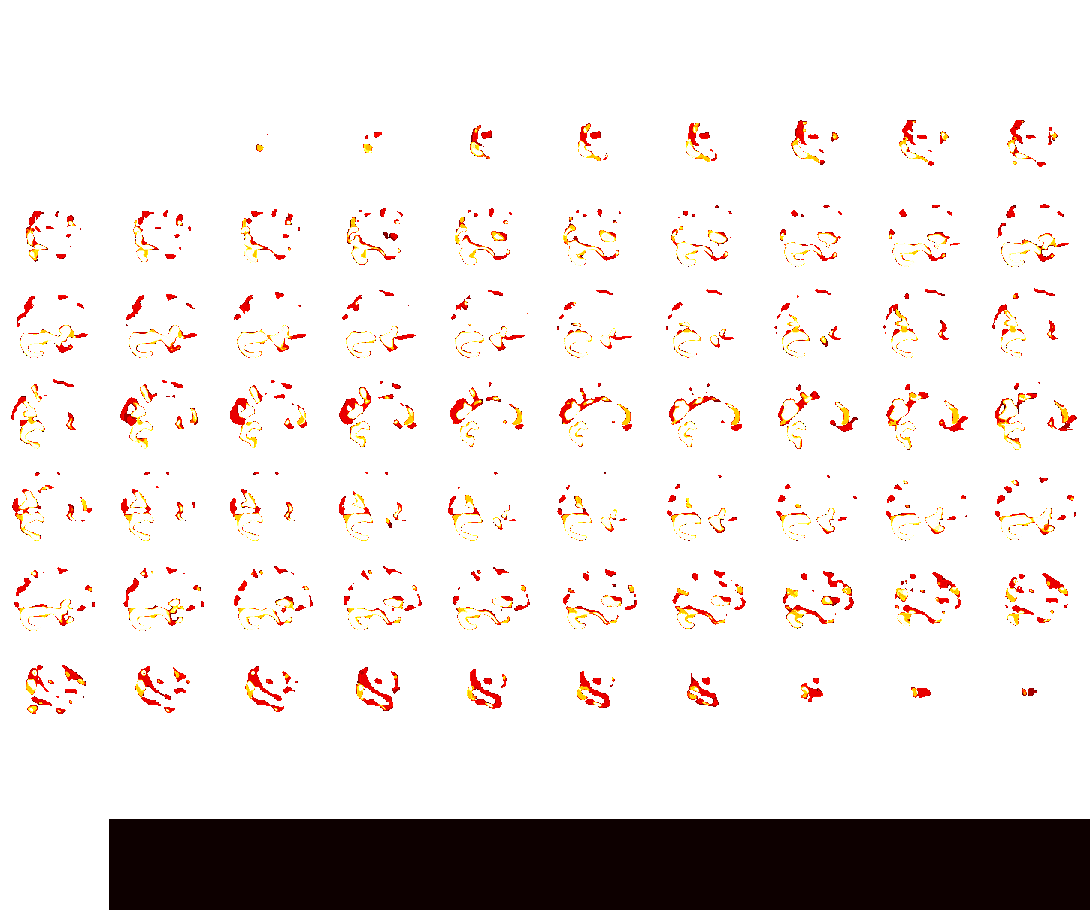

In [6]:
num_comp = 0 # the component number
comp = model.masker_.inverse_transform(model.components_[num_comp,:].todense())
plotting.view_img(comp, threshold=0.1, vmax=1, title="Dwell time: {dt}".format(dt=model.dwell_time_[num_comp]))

Then in static plots.

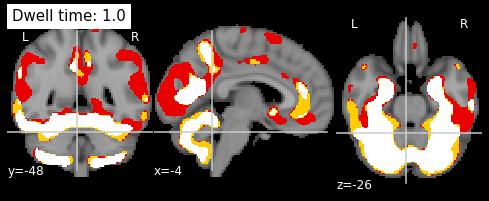

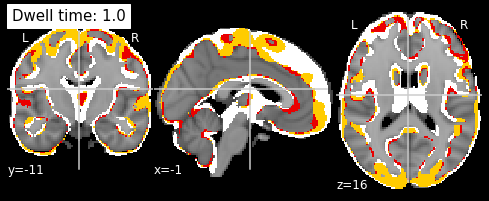

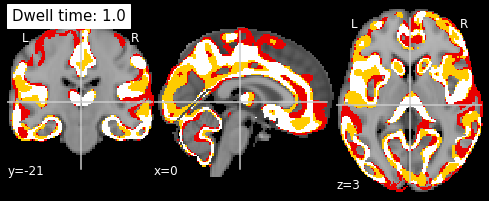

In [7]:
#interate through the components and plot them
num_comp = 0
while num_comp < 3:
    comp = model.masker_.inverse_transform(model.components_[num_comp,:].todense())
    plotting.plot_stat_map(comp, threshold=0.2, vmax=1, colorbar=False, black_bg=True, title="Dwell time: {dt}".format(dt=model.dwell_time_[num_comp]))
    plotting.show()
    num_comp += 1

It is possible to generate a R2 map, which quantifies the quality of this embedding. It computes the fraction of the variance of the anatamical vbm file captured by the parcels. A score of 1 means perfect approximation. The score can be negative, in which case the parcellation approximation performs worst than the average of the signal. 

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images


/home/lussier/.local/lib/python3.6/site-packages/nilearn/signal.py:163: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/home/lussier/.local/lib/python3.6/site-packages/nilearn/signal.py:61: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals



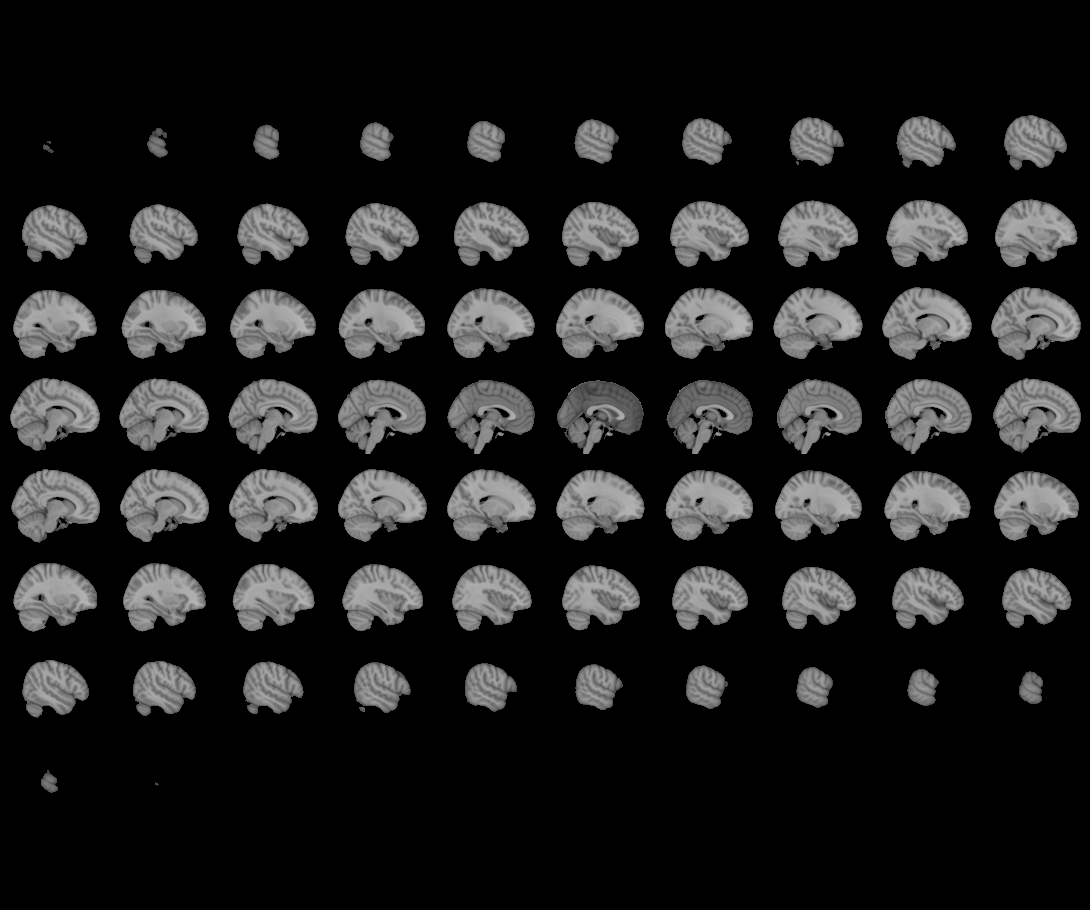
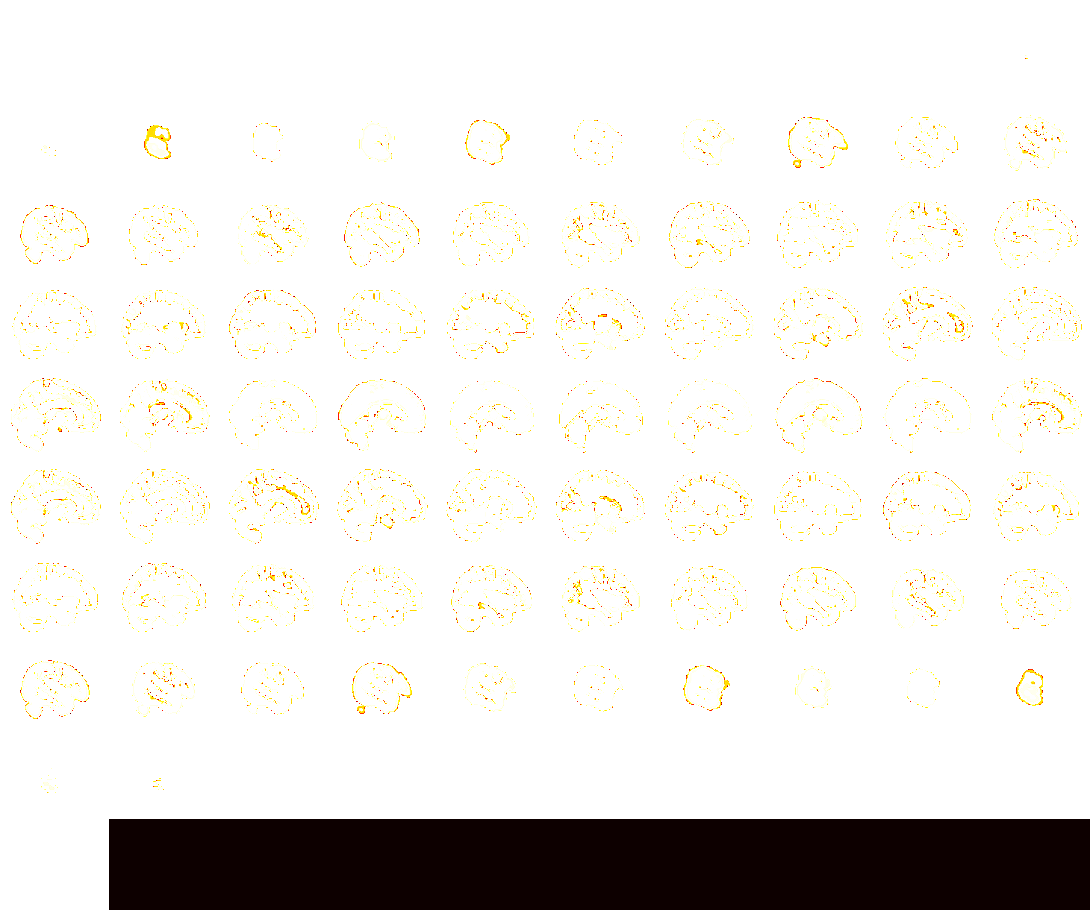

In [8]:
num_s = 0 # the subject number
img = model.load_img(anat[num_s])

score = model.score(img)
plotting.view_img(score, vmax=1)

We can save the R2 maps as nifti files for further processing or use with Nistats/Nilearn. 